# The project's goals

In this project, I will analyze a dataset with information about the most popular dogs as pets.

The primary objective of this project is **to help my friend find the dog breed that best suits him**, taking into account his personal preferences and lifestyle to ensure he selects a dog that meets his needs and expectations. I aim to provide a strong recommendation.

I intend to do that by answering the following questions:

    - What is the average lifespan of a dog? Which dog has the highest and lowest Lifespan?
    - What is the most common dog size?
    - From which origin country there are the most dog breeds in the dataset?
    - Is there a correlation between a dog's weight and its lifespan?
    - What are the most popular dogs?

These questions will be answered through data analysis - I will organize, sort, and group the data to find out what attributes affect dog popularity, and later visualize my findings to make the data more understandable and accessible.

I will analyze close to 100 of the most popular dog breeds in the world, based on important factors such as size, weight, lifespan, origin, popularity and more.

I will do so using **Python** and various methods from the **Pandas** library, and later visualize the data using the **matplotlib** and **seaborn** libraries.

# Preparing the Data for Analysis
In this section, I will:

    - Import the data into a pandas DataFrame in Python
    - Explain the structure of the dataset, including the meaning of the columns and their values
    - Identify and address any outliers, errors, or missing values
    - Determine if any columns require conversion to a different datatype and perform the necessary conversions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dogs = pd.read_excel("dog_breeds_data.xlsx")

In [3]:
dogs.head() #Viewing the first five rows from the table:

,Breed,Size,Weight (kg),Average Lifespan (years),Temperament,Origin,Coat Type,Trainability,Date of Identification,Popularity,Intelligence Score
0,German Shepherd,Large,35.0,11,Loyal,Germany,Double coat,High,1990-03-11 00:00:00,100,95
1,Labrador Retriever,Large,32.0,12,Friendly,Canada,Double coat,High,1900-08-22 00:00:00,99,92
2,French Bulldog,Medium,23.0,8,Calm,England,Smooth,Medium,1800/05/12,98,77
3,Poodle,Medium,27.0,14,Intelligent,Germany,Curly,High,NaN,97,94
4,Beagle,Small,10.0,13,Merry,England,Short,Medium,1800/04/20,96,72


In [4]:
dogs.tail() #Viewing the last five rows from the table:

,Breed,Size,Weight (kg),Average Lifespan (years),Temperament,Origin,Coat Type,Trainability,Date of Identification,Popularity,Intelligence Score
91,Border Collie,Medium,18.0,14,Intelligent,Scotland,Rough,High,1800/09/05,9,100
92,Shiba Inu,Medium,11.0,12,Independent,Japan,Double,Independent,1800/08/20,8,79
93,Whippet,Medium,14.0,12,Gentle,England,Smooth,Medium,NaN,7,78
94,English Bulldog,Medium,23.0,12,"Loyal, courageous, affectionate",United Kingdom,Short,Low,NaN,6,65
95,Pug,Small,7.0,15,"Charming, playful, sociable",China,Short,Medium,NaN,5,88


In [5]:
dogs.info() #Viewing some information about the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Breed                     96 non-null     object 
 1   Size                      96 non-null     object 
 2   Weight (kg)               96 non-null     float64
 3   Average Lifespan (years)  96 non-null     int64  
 4   Temperament               96 non-null     object 
 5   Origin                    96 non-null     object 
 6   Coat Type                 96 non-null     object 
 7   Trainability              96 non-null     object 
 8   Date of Identification    67 non-null     object 
 9   Popularity                96 non-null     int64  
 10  Intelligence Score        96 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.4+ KB


### The Dataset
a simple description of each column:

    - Breed: The specific breed of the dog.
    - Size: The general size of the breed (small, medium, large).
    - Average Weight (kg): The typical weight of the breed in kilograms.
    - Average Lifespan (years): The average number of years a specific breed typically lives.
    - Temperament: The breed’s usual personality (friendly, calm).
    - Origin: The country where the breed comes from.
    - Coat Type: The type of fur the breed has (short, long).
    - Trainability: How easy it is to train the breed.
    - Date of Identification: The date when the breed was officially recognized.
    - Popularity: The popularity ranking of the dog breed.
    - Intelligence Score : the intelligence ranking of the dog breed.
    

In [6]:
# Transform to datetime format
dogs["Date of Identification"] = pd.to_datetime(dogs["Date of Identification"], dayfirst=True)

In [7]:
# Viewing the new data type
print(dogs["Date of Identification"].dtype)

datetime64[ns]


In [8]:
# Filters rows with Null values and shows them
dogs[dogs["Date of Identification"].isna()].head()

,Breed,Size,Weight (kg),Average Lifespan (years),Temperament,Origin,Coat Type,Trainability,Date of Identification,Popularity,Intelligence Score
3,Poodle,Medium,27.0,14,Intelligent,Germany,Curly,High,NaT,97,94
8,Dachshund,Small,9.0,14,Clever,Germany,Short,Medium,NaT,92,75
11,Doberman Pinscher,Large,40.0,11,Alert,Germany,Short,High,NaT,89,95
16,Pomeranian,Toy,3.0,12,Lively,Poland,Double,Medium,NaT,84,70
17,Border Collie,Medium,20.0,14,Intelligent,Scotland,Double,High,NaT,83,100


In [9]:
# Fills missing (Null) values with the string 'Not Available'
dogs["Date of Identification"] = dogs["Date of Identification"].fillna("Not Available")

In [10]:
# Viewing information after filling missing values
# We see that after filling in the missing values, the data type of the column changes back to Object.
# This happens because pandas treats any column with strings as an object.
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Breed                     96 non-null     object 
 1   Size                      96 non-null     object 
 2   Weight (kg)               96 non-null     float64
 3   Average Lifespan (years)  96 non-null     int64  
 4   Temperament               96 non-null     object 
 5   Origin                    96 non-null     object 
 6   Coat Type                 96 non-null     object 
 7   Trainability              96 non-null     object 
 8   Date of Identification    96 non-null     object 
 9   Popularity                96 non-null     int64  
 10  Intelligence Score        96 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.4+ KB


In [11]:
# Filters "Date of Identification" column after the changes
dogs["Date of Identification"]

0     1990-03-11 00:00:00
1     1900-08-22 00:00:00
2     1800-05-12 00:00:00
3           Not Available
4     1800-04-20 00:00:00
             ...         
91    1800-09-05 00:00:00
92    1800-08-20 00:00:00
93          Not Available
94          Not Available
95          Not Available
Name: Date of Identification, Length: 96, dtype: object

In [12]:
# Length
len(dogs.Breed)

96

In [13]:
# Number of unique values
dogs.Breed.nunique()

90

In [14]:
# Removes duplicate values
dogs["Breed"] = dogs["Breed"].drop_duplicates()

In [15]:
# Drops missing (Null) values
dogs.dropna(subset=["Breed"], inplace=True)

In [16]:
# Checks the new number of rows.
dogs.count()

Breed                       90
Size                        90
Weight (kg)                 90
Average Lifespan (years)    90
Temperament                 90
Origin                      90
Coat Type                   90
Trainability                90
Date of Identification      90
Popularity                  90
Intelligence Score          90
dtype: int64

In [17]:
# Drop columns that are not relevant for the analysis
dogs.drop(["Temperament", "Date of Identification", "Intelligence Score"], axis=1, inplace=True)

In [18]:
# Viewing the column names of the DataFrame
dogs.columns

Index(['Breed', 'Size', 'Weight (kg)', 'Average Lifespan (years)', 'Origin',
       'Coat Type', 'Trainability', 'Popularity'],
      dtype='object')

In [19]:
# Renaming column names to shorter versions for easier reference in further analysis.
dogs.rename(columns={'Weight (kg)':'Weight', 'Average Lifespan (years)':'Lifespan'}, inplace=True)

In [20]:
# Viewing the new columns names
dogs.columns

Index(['Breed', 'Size', 'Weight', 'Lifespan', 'Origin', 'Coat Type',
       'Trainability', 'Popularity'],
      dtype='object')

In [21]:
# Resets the index to the default integer index after dropping duplicates.
dogs.reset_index(drop=True, inplace=True)

# Data Analysis
At this stage, I will check which dog breed relevant to each characteristic by answering the questions from the first section.

In [22]:
# Showing the relevant columns
dogs[["Breed", "Lifespan"]]

,Breed,Lifespan
0,German Shepherd,11
1,Labrador Retriever,12
2,French Bulldog,8
3,Poodle,14
4,Beagle,13
...,...,...
85,Tibetan Terrier,15
86,Australian Kelpie,12
87,Otterhound,10
88,English Bulldog,12


In [23]:
# Sorting the dogs by 'Lifespan' in descending order
dogs[["Breed", "Lifespan"]].sort_values(by= "Lifespan", ascending=False)

,Breed,Lifespan
43,Papillon,16
26,Bichon Frise,15
64,Miniature Pinscher,15
72,Alaskan Klee Kai,15
89,Pug,15
...,...,...
9,Great Dane,8
2,French Bulldog,8
18,Mastiff,8
81,Chinese Shar-Pei,8


In [24]:
# Displaying the top 5 dog breeds with the highest lifespan
dogs[['Breed', 'Lifespan']].nlargest(n=5, columns='Lifespan')

,Breed,Lifespan
43,Papillon,16
26,Bichon Frise,15
31,Chihuahua,15
51,Lhasa Apso,15
64,Miniature Pinscher,15


In [25]:
# Displaying the top 5 dog breeds with the lowest lifespan
dogs[['Breed', 'Lifespan']].nsmallest(n=5, columns='Lifespan')

,Breed,Lifespan
60,Irish Wolfhound,6
2,French Bulldog,8
9,Great Dane,8
15,Bernese Mountain Dog,8
18,Mastiff,8


In [26]:
# Counts the frequency of what is the most common lifespan
mask = dogs["Lifespan"].value_counts()

In [27]:
# Showing the distribution of lifespans for dogs
mask

Lifespan
12    33
14    18
13    10
15     8
10     7
8      6
11     4
9      2
16     1
6      1
Name: count, dtype: int64

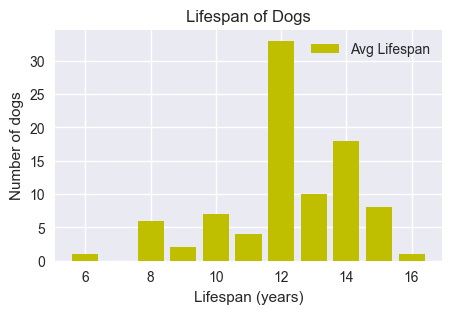

In [28]:
# Displays the distribution of dog lifespans on a bar chart,
# indicating that most dogs live between 12-14 years
plt.figure(figsize=(5,3))
plt.style.use('seaborn-v0_8')
plt.bar(mask.index, mask, color='y', label="Avg Lifespan")
plt.title("Lifespan of Dogs")
plt.xlabel("Lifespan (years)")
plt.ylabel("Number of dogs")
plt.legend()
plt.show()

In [29]:
# Showing the relevant columns
dogs[["Breed", "Size"]]

,Breed,Size
0,German Shepherd,Large
1,Labrador Retriever,Large
2,French Bulldog,Medium
3,Poodle,Medium
4,Beagle,Small
...,...,...
85,Tibetan Terrier,Small
86,Australian Kelpie,Medium
87,Otterhound,Large
88,English Bulldog,Medium


In [30]:
# Counts how many times each size category appears in the dataset
mask = dogs.Size.value_counts()

In [31]:
# Showing the information before display on a chart.
mask

Size
Medium    31
Small     26
Large     22
Giant      7
Toy        4
Name: count, dtype: int64

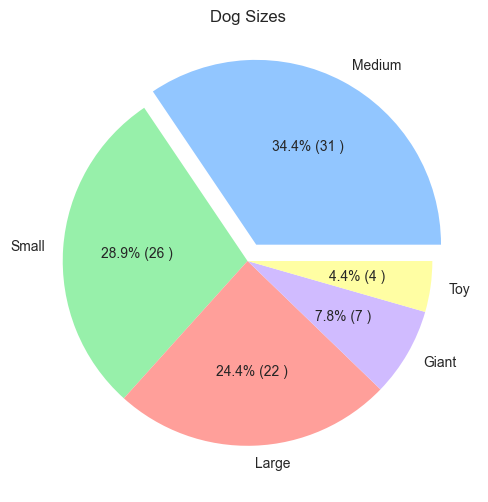

In [32]:
# Shows the size distribution of dogs using a pie chart,
# highlighting the most common size (Medium)
plt.figure(figsize=(6,6))
plt.style.use('seaborn-v0_8-pastel')
plt.pie(mask, labels=mask.index,
        autopct=lambda p: "{:.1f}% ({:.0f} )".format(p, p*sum(mask)/100),
        explode=(0.1,0,0,0,0))
plt.title("Dog Sizes")
plt.show()

In [33]:
# Showing the relevant columns
dogs[["Breed", "Origin"]]

,Breed,Origin
0,German Shepherd,Germany
1,Labrador Retriever,Canada
2,French Bulldog,England
3,Poodle,Germany
4,Beagle,England
...,...,...
85,Tibetan Terrier,Tibet
86,Australian Kelpie,Australia
87,Otterhound,England
88,English Bulldog,United Kingdom


In [34]:
# Counts top 15 "Origin Country" values
mask = dogs["Origin"].value_counts().head(15)

In [35]:
# Showing the information before display on a chart.
mask

Origin
England        17
Germany        12
Scotland        7
USA             7
Belgium         5
Australia       5
Japan           4
China           4
Tibet           3
Russia          3
Ireland         3
Italy           2
Canada          2
Switzerland     2
Wales           2
Name: count, dtype: int64

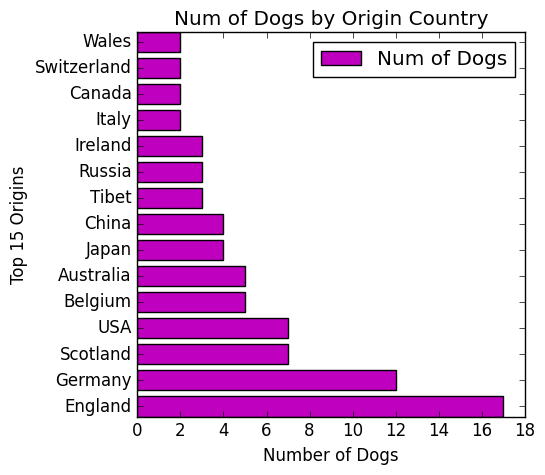

In [36]:
# Displays the number of dogs by country using a barh chart, 
# with the most common origins being England, Germany, Scotland and the United States.
plt.figure(figsize=(5,5))
plt.style.use('classic')
plt.barh(mask.index, mask, color='m', label="Num of Dogs")
plt.title("Num of Dogs by Origin Country")
plt.xlabel("Number of Dogs")
plt.ylabel("Top 15 Origins")
plt.legend()
plt.show()

In [37]:
# Filters to show only dogs from England, the most common origin
dogs[dogs["Origin"]=="England"].head()

,Breed,Size,Weight,Lifespan,Origin,Coat Type,Trainability,Popularity
2,French Bulldog,Medium,23.0,8,England,Smooth,Medium,98
4,Beagle,Small,10.0,13,England,Short,Medium,96
5,Yorkshire Terrier,Toy,3.2,13,England,Long silky,Medium,95
18,Mastiff,Giant,85.0,8,England,Short,Medium,82
27,Cocker Spaniel,Medium,14.0,14,England,Long,Medium,73


In [38]:
# Showing the relevant columns
dogs[["Breed", "Size", "Weight", "Lifespan"]]

,Breed,Size,Weight,Lifespan
0,German Shepherd,Large,35.0,11
1,Labrador Retriever,Large,32.0,12
2,French Bulldog,Medium,23.0,8
3,Poodle,Medium,27.0,14
4,Beagle,Small,10.0,13
...,...,...,...,...
85,Tibetan Terrier,Small,9.0,15
86,Australian Kelpie,Medium,20.0,12
87,Otterhound,Large,35.0,10
88,English Bulldog,Medium,23.0,12


In [39]:
# Grouping dogs by size and viewing the maximum lifespan for each size
dogs.groupby("Size")["Lifespan"].max().to_frame()

,Lifespan
Size,
Giant,10
Large,14
Medium,15
Small,16
Toy,15


In [40]:
# Grouping dogs by size and displaying the minimum lifespan for each size
dogs.groupby("Size")["Lifespan"].min().to_frame()

,Lifespan
Size,
Giant,6
Large,8
Medium,8
Small,12
Toy,12


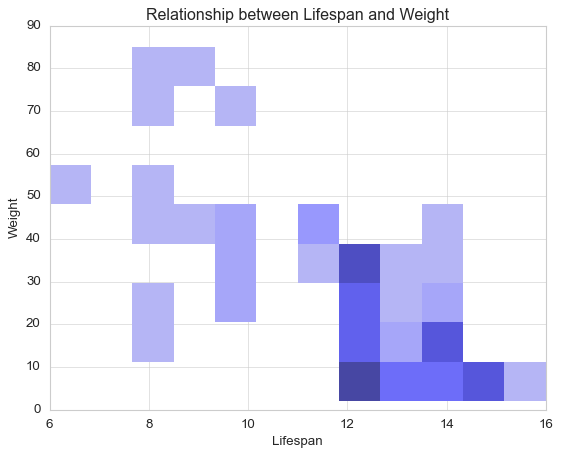

In [41]:
# Analyzing the Relationship Between a Dog's Lifespan and Its Weight
# indicating that larger dogs tend to have shorter lifespans than smaller dogs.
sb.set_style("whitegrid")
sb.histplot(data=dogs, x='Lifespan', y='Weight')
plt.title("Relationship between Lifespan and Weight")
plt.show()

In [42]:
# Showing the relevant columns
dogs[["Breed", "Popularity"]]

,Breed,Popularity
0,German Shepherd,100
1,Labrador Retriever,99
2,French Bulldog,98
3,Poodle,97
4,Beagle,96
...,...,...
85,Tibetan Terrier,13
86,Australian Kelpie,11
87,Otterhound,10
88,English Bulldog,6


In [43]:
# Sort the dataset by dog popularity and select the top 15
mask = dogs[["Breed", "Popularity"]].sort_values(by='Popularity').tail(15)

In [44]:
# Showing the information before display on a chart.
mask

,Breed,Popularity
14,Siberian Husky,86
13,Australian Shepherd,87
12,Miniature Schnauzer,88
11,Doberman Pinscher,89
10,Shih Tzu,90
9,Great Dane,91
8,Dachshund,92
7,Boxer,93
6,Rottweiler,94
5,Yorkshire Terrier,95


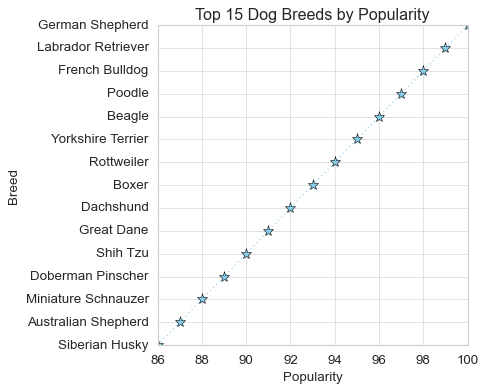

In [46]:
# Create a line plot displaying the top 15 dog breeds by popularity
# Each data point is marked with a star, and the line connects the points in the order of their popularity ranking
# The top 3 dog breeds are German Shepherd (ranked 1st), Labrador  (ranked 2nd), and French Bulldog (ranked 3rd).
plt.figure(figsize=(5,5))
plt.plot(mask['Popularity'], mask['Breed'], marker='*', color='skyblue', linestyle=':', markersize=10)
plt.xlabel('Popularity')
plt.ylabel('Breed')
plt.title('Top 15 Dog Breeds by Popularity')
plt.show()

# Conclusions
After conducting an in-depth analysis of the data, I reached several valuable conclusions that will help my friend choose the dog breed that best suits him.

One of the most **unexpected** discoveries was that **smaller dogs** tend to have a **longer lifespan** compared to larger breeds.

Additionally, based on the dataset:
- Most dogs live between **12-14 years**.
- The most common origin countries are **England**, Germany, Scotland, and the United States.
- The top three dog breeds are:
1. **German Shepherd** (ranked 1st)
2. Labrador (ranked 2nd)
3. French Bulldog (ranked 3rd)

These findings provide meaningful insights into dog characteristics and help make an informed decision.